In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from selenium import webdriver as wb
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
import seaborn as sns
from tqdm import tqdm
import datetime
import time
from wordcloud import WordCloud

### 비트코인과 안정자산, 위험자산의 상관관계 분석
- 데이터 산출 기간 : 2021.01.01 ~ 2024.06.01
- 안전자산 비교군 : 금, 달러
- 위험자산 비교군 : 원유
- 데이터 출처 : Yahoo Finance

In [2]:
# 기간
start_date = "2021-01-01"
end_date = "2024-06-01"
news_date_list = ["2022.03.28", "2022.11.14", "2023.04.03", "2024.01.08", "2024.03.25", "2024.05.06"]

# 종목
bitcoin = "BTC-USD"
gold = "GC=F"
gold_etf = "GLD"
usd = "EURUSD=X"
us_etf = "TLT"
wti = "CL=F"
brent = "BZ=F"
sample = "080220.KQ"

In [3]:
# 티커 데이터 수집
ticker = yf.download(usd, start_date, end_date)
ticker["change"] = ticker["Adj Close"].diff()
ticker["daily_return"] = ticker["Adj Close"].pct_change()*100
ticker = ticker.dropna() # NaN 포함 행 삭제
ticker

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,change,daily_return
Date,,,,,,,,
2021-01-04,1.224905,1.230999,1.217137,1.225070,1.225070,0,0.007043,0.578221
2021-01-05,1.225295,1.229483,1.224995,1.225160,1.225160,0,0.000090,0.007356
2021-01-06,1.229861,1.235025,1.226693,1.230027,1.230027,0,0.004868,0.397299
2021-01-07,1.233776,1.234568,1.224665,1.234111,1.234111,0,0.004083,0.331976
2021-01-08,1.226873,1.228215,1.221493,1.227144,1.227144,0,-0.006966,-0.564484
...,...,...,...,...,...,...,...,...
2024-05-27,1.084763,1.086720,1.084175,1.084763,1.084763,0,0.003495,0.323252
2024-05-28,1.086189,1.088945,1.085906,1.086189,1.086189,0,0.001426,0.131434
2024-05-29,1.085187,1.085894,1.080953,1.085187,1.085187,0,-0.001002,-0.092245


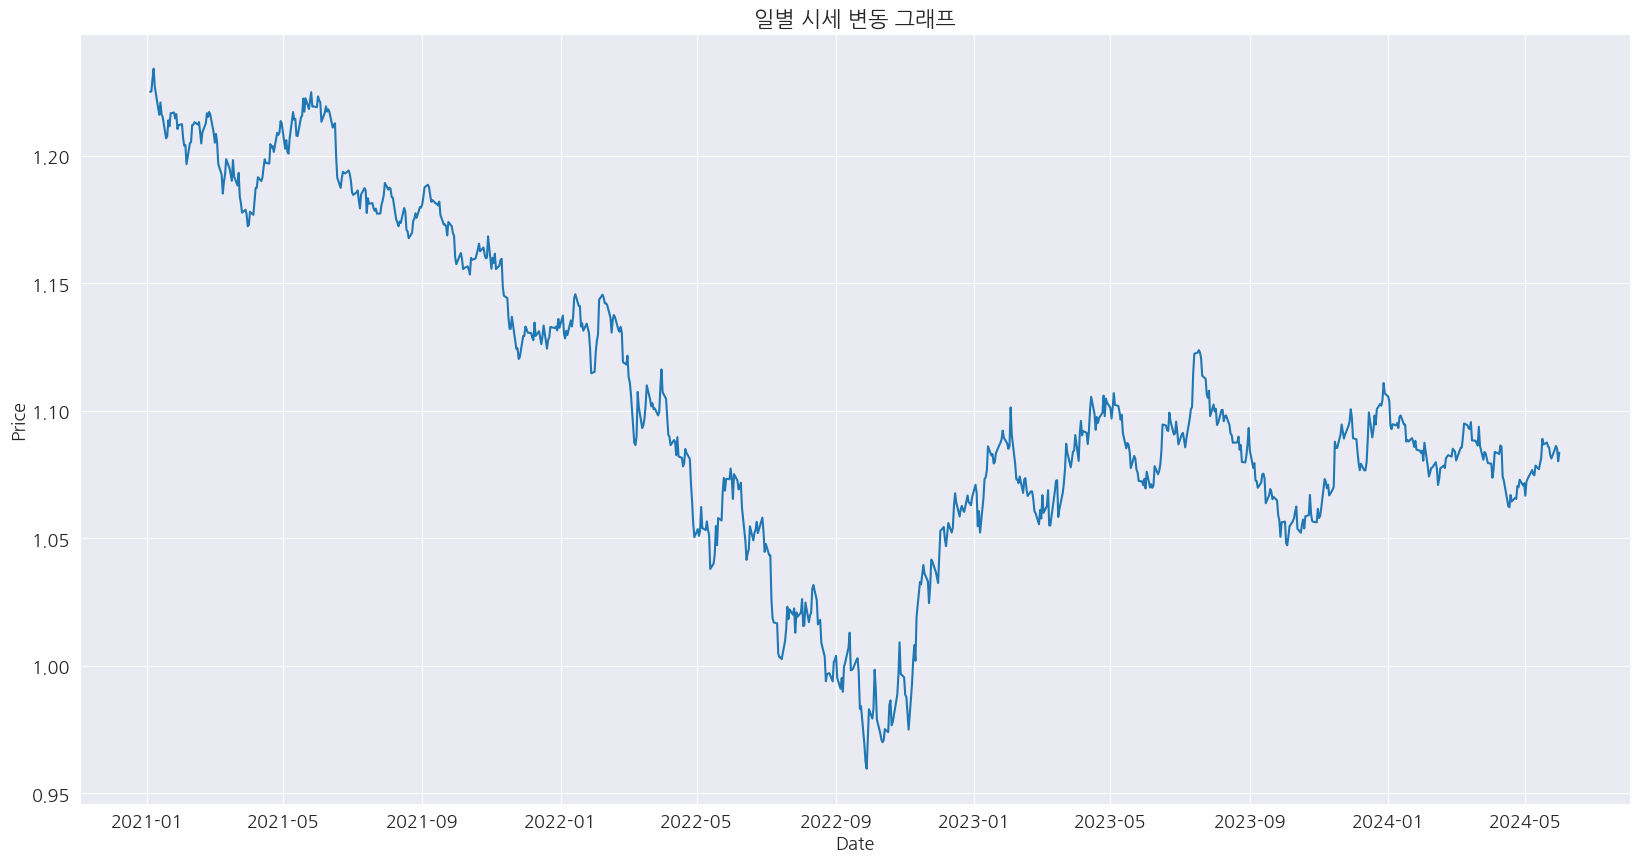

In [4]:
# daily price change graph
x = ticker.index
y = ticker["Adj Close"]

plt.rc("font", family = "NanumGothic", size = 13)
plt.rcParams["axes.unicode_minus"] = False
plt.figure(figsize = (20, 10))
plt.plot(x, y)
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("일별 시세 변동 그래프")
plt.show()

In [5]:
# 주간 수익률 (=증감률)의 변동성 확인
ticker_wk = yf.download(usd, start_date, end_date, interval = "1wk")
ticker_wk["weekly_return"] = ticker_wk["Adj Close"].pct_change()*100
ticker_wk = ticker_wk.dropna()
ticker_wk

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,weekly_return
Date,,,,,,,
2021-01-08,1.226873,1.228215,1.211314,1.216249,1.216249,0,-1.447335
2021-01-15,1.215300,1.217196,1.205545,1.211563,1.211563,0,-0.385283
2021-01-22,1.216619,1.218800,1.206200,1.210507,1.210507,0,-0.087147
2021-01-29,1.212136,1.215701,1.196716,1.204239,1.204239,0,-0.517831
2021-02-05,1.196745,1.215099,1.195357,1.212121,1.212121,0,0.654551
...,...,...,...,...,...,...,...
2024-05-03,1.073307,1.080941,1.072501,1.074691,1.074691,0,0.236438
2024-05-10,1.078516,1.089681,1.076206,1.088981,1.088981,0,1.329638
2024-05-17,1.086779,1.089562,1.081303,1.082520,1.082520,0,-0.593222


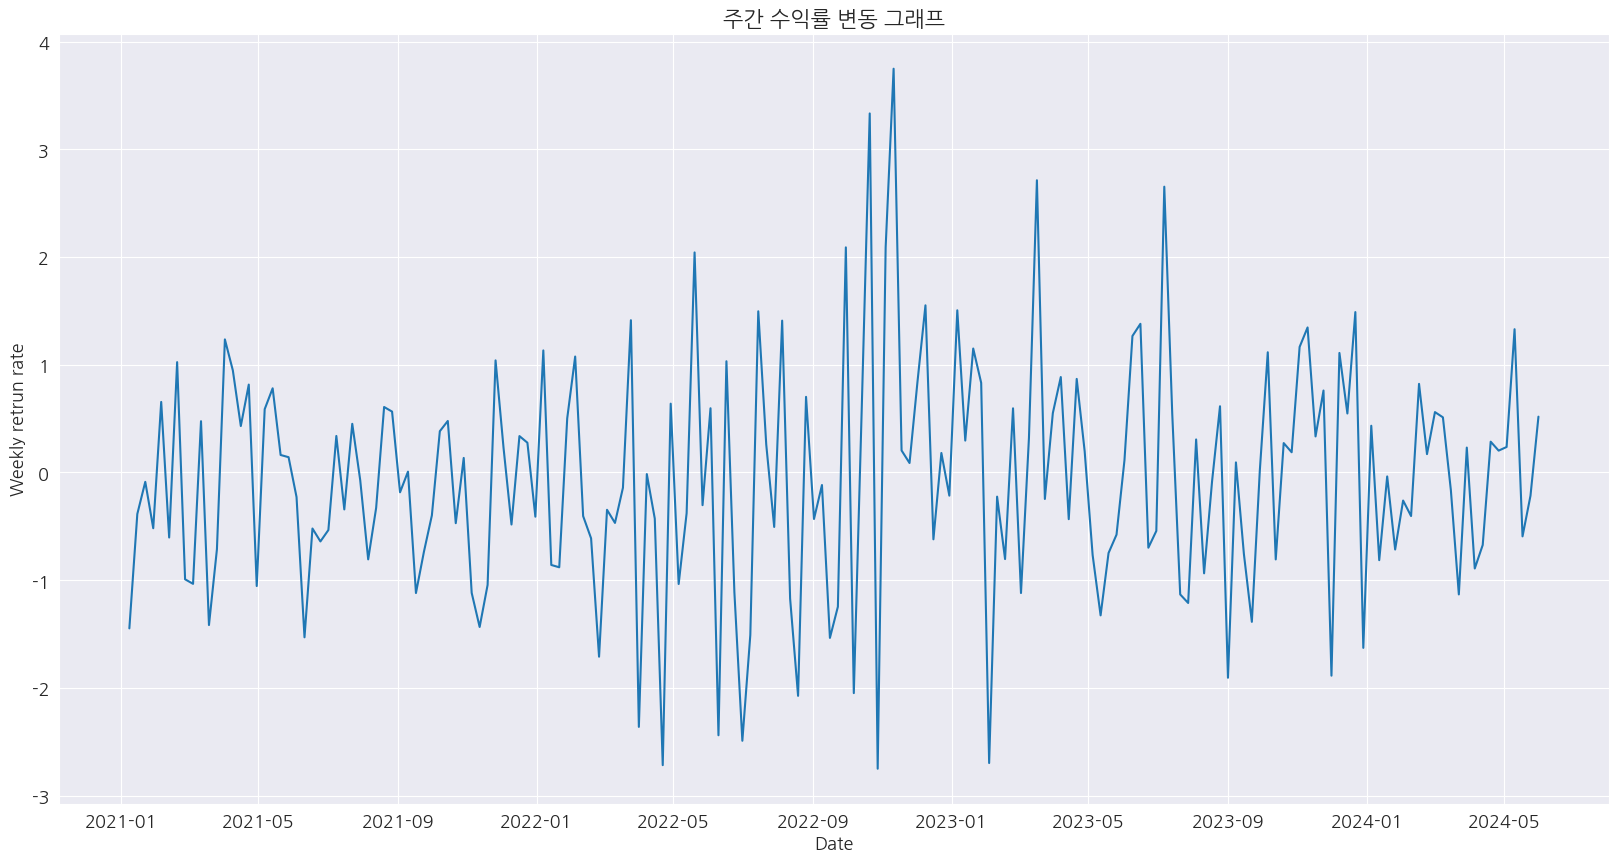

In [6]:
# weekly return rate change graph
wk_x = ticker_wk.index
wk_y = ticker_wk["weekly_return"]

plt.rc("font", family = "NanumGothic", size = 13)
plt.rcParams["axes.unicode_minus"] = False
plt.figure(figsize = (20, 10))
plt.plot(wk_x, wk_y)
plt.xlabel("Date")
plt.ylabel("Weekly retrun rate")
plt.title("주간 수익률 변동 그래프")
plt.show()

In [7]:
# 비트코인과 각 종목의 연관관계 산출을 위한 티커 데이터 수집
bit_ticker = yf.download(bitcoin, start_date, end_date)
bit_ticker["daily_return"] = bit_ticker["Adj Close"].pct_change()*100
bit_ticker = bit_ticker.dropna() # NaN 포함 행 삭제
bit_ticker

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,daily_return
Date,,,,,,,
2021-01-02,29376.455078,33155.117188,29091.181641,32127.267578,32127.267578,67865420765,9.372578
2021-01-03,32129.408203,34608.558594,32052.316406,32782.023438,32782.023438,78665235202,2.038007
2021-01-04,32810.949219,33440.218750,28722.755859,31971.914062,31971.914062,81163475344,-2.471200
2021-01-05,31977.041016,34437.589844,30221.187500,33992.429688,33992.429688,67547324782,6.319658
2021-01-06,34013.613281,36879.699219,33514.035156,36824.363281,36824.363281,75289433811,8.331071
...,...,...,...,...,...,...,...
2024-05-27,68512.179688,70597.882812,68232.500000,69394.554688,69394.554688,25870990717,1.279167
2024-05-28,69392.195312,69514.640625,67227.156250,68296.218750,68296.218750,32722265965,-1.582741
2024-05-29,68296.351562,68852.460938,67101.492188,67578.093750,67578.093750,26707072906,-1.051486


In [8]:
# 비트코인과 티커 간의 상관관계 산출
bit_corr = bit_ticker["daily_return"] / ticker["daily_return"]
bit_corr = bit_corr.dropna()
bit_corr

Date
2021-01-04     -4.273800
2021-01-05    859.058029
2021-01-06     20.969249
2021-01-07     20.832073
2021-01-08     -6.418947
                 ...    
2024-05-27      3.957188
2024-05-28    -12.042137
2024-05-29     11.398850
2024-05-30     -2.524599
2024-05-31     -4.109080
Name: daily_return, Length: 890, dtype: float64

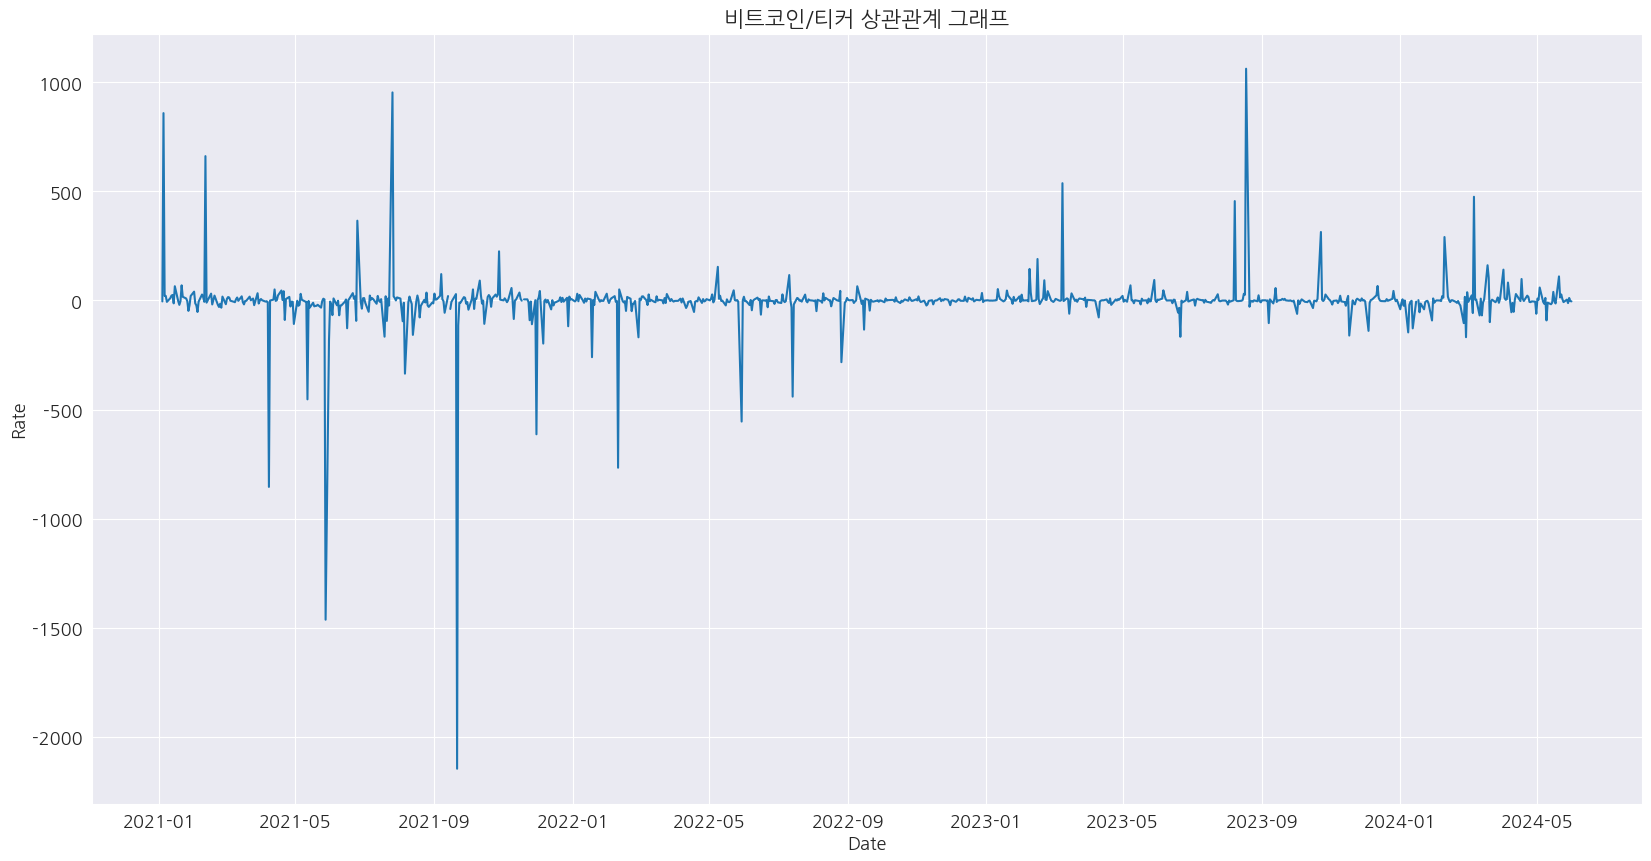

In [9]:
# 상관관계 그래프 시각화
plt.rc("font", family = "NanumGothic", size = 13)
plt.rcParams["axes.unicode_minus"] = False
plt.figure(figsize = (20, 10))
plt.plot(bit_corr.index, bit_corr)
plt.xlabel("Date")
plt.ylabel("Rate")
plt.title("비트코인/티커 상관관계 그래프")
plt.show()

In [10]:
# 상승, 하락이 관계 없는 주간 변동성 추출
ticker_chg_abs = (ticker_wk["Adj Close"].pct_change()*100).abs()
# 변동성 큰 구간 TOP6
large_chg = ticker_chg_abs.sort_values(ascending = False)
top6_chg = large_chg[:6]
top6_chg

Date
2022-11-11    3.747401
2022-10-21    3.332367
2022-10-28    2.750005
2022-04-22    2.716884
2023-03-17    2.712166
2023-02-03    2.697177
Name: Adj Close, dtype: float64

- 각 종목들 간 상관계수 분석

In [11]:
# 비트코인과 티커의 상관계수 계산
df_close = pd.concat([bit_ticker["Adj Close"], ticker["Adj Close"]], axis = 1)
df_close.columns = ["bit_close", "tk_close"]
df_close = df_close.dropna()
corr_coefficient = np.corrcoef(df_close["bit_close"], df_close["tk_close"])[0, 1]
print(f"비트코인과 티커의 상관계수 : {corr_coefficient:.4f}")

비트코인과 티커의 상관계수 : 0.5133


In [12]:
# 일별 수정종가 (Adj Close) 추출 함수
def daily_adj_close(tk_name, ds, de) :
    result = yf.download(tk_name, ds, de)
    return result["Adj Close"]

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


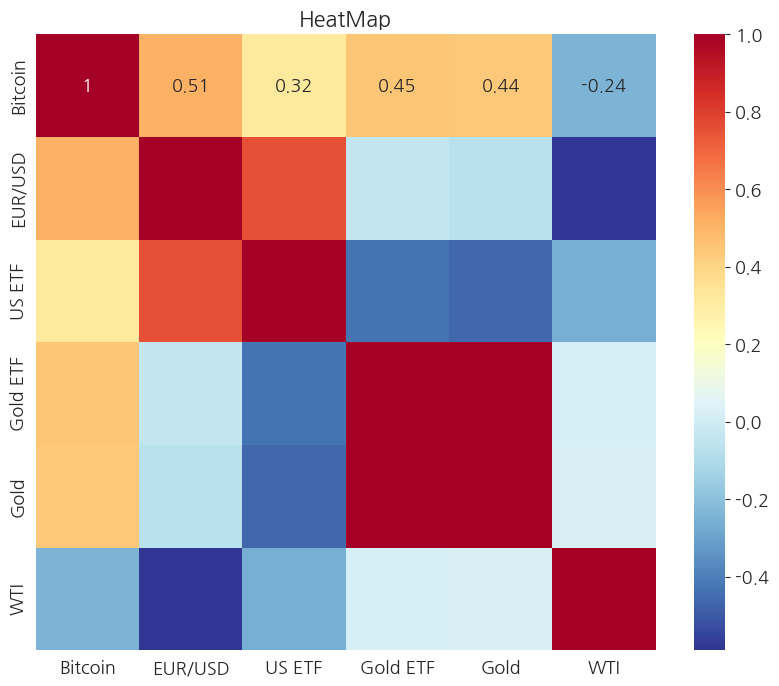

In [13]:
# 상관계수 시각화 - Heatmap
corr_matrix = pd.DataFrame({'Bitcoin': daily_adj_close(bitcoin, start_date, end_date), 'EUR/USD': daily_adj_close(usd, start_date, end_date), 'US ETF' : daily_adj_close(us_etf, start_date, end_date), 'Gold ETF' : daily_adj_close(gold_etf, start_date, end_date), 'Gold' : daily_adj_close(gold, start_date, end_date), 'WTI' : daily_adj_close(wti, start_date, end_date)}).corr()
plt.rc("font", family = "NanumGothic", size = 13)
plt.rcParams["axes.unicode_minus"] = False
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot = True, cmap='RdYlBu_r', cbar=True)
plt.title("HeatMap")
plt.show()

- 티커의 변동성이 큰 날짜와 특정 날짜의 네이버 뉴스 크롤링

In [14]:
news_date_list = pd.to_datetime(news_date_list, format="%Y.%m.%d").tolist()
top6_lst = top6_chg.index.to_list()
news_date_list.extend(top6_lst)
news_date_list

[Timestamp('2022-03-28 00:00:00'),
 Timestamp('2022-11-14 00:00:00'),
 Timestamp('2023-04-03 00:00:00'),
 Timestamp('2024-01-08 00:00:00'),
 Timestamp('2024-03-25 00:00:00'),
 Timestamp('2024-05-06 00:00:00'),
 Timestamp('2022-11-11 00:00:00'),
 Timestamp('2022-10-21 00:00:00'),
 Timestamp('2022-10-28 00:00:00'),
 Timestamp('2022-04-22 00:00:00'),
 Timestamp('2023-03-17 00:00:00'),
 Timestamp('2023-02-03 00:00:00')]

In [15]:
news_titles = []
search = input("뉴스 검색어 입력 (ex. 비트코인 달러) : ")

driver = wb.Chrome()
driver.maximize_window()
for i in tqdm(range(len(news_date_list))) :
    # 뉴스 검색 기간 : 지정된 날짜 포함 일주일
    news_ds = news_date_list[i]
    news_de = news_ds + datetime.timedelta(days = 6)
    driver.get(f"https://search.naver.com/search.naver?where=news&query={search}&sm=tab_opt&sort=0&photo=0&field=0&pd=3&ds={news_ds.strftime('%Y.%m.%d')}&de={news_de.strftime('%Y.%m.%d')}&docid=&related=0&mynews=0&office_type=0&office_section_code=0")
    
    body = driver.find_element(By.TAG_NAME, "body")
    try :
        # 스크롤
        for _ in range(10) :
            body.send_keys(Keys.END)
            time.sleep(1)
            
        # 뉴스 타이틀 수집
        titles = driver.find_elements(By.CSS_SELECTOR, "a.news_tit")
        for i in titles :
            news_titles.append(i.text)
    except Exception as e :
        print("오류 : ", e)
print("완료😇")
driver.quit()

100%|██████████| 12/12 [02:23<00:00, 11.99s/it]


완료😇


In [16]:
print(len(news_titles))
print(news_titles)

1298
['[IT큐레이션] 비트코인, 러시아 구원할까', '\'자칭 사토시\' 크레이그 라이트 "비트코인 쓸모 없어...110만 BTC 매도 계획"', "[코인시황] 큰손들 등장에 '비트코인' 상승세…5700만원대", "'비트코인 직접 투자 vs ETF 투자'…뭐가 더 유리할까?", "[빗썸 시세] 리플 소폭 하락 '비트코인 영향 분석'", "[위클리마켓뷰] 비트코인, 美·EU 규제에 '롤러코스터'", "달러도 영원할 수는 없다... 언젠가는 비트코인이 '킹 머니' 자리를? [기승전...", "비트코인 '세 번째 고래', 일주일 만 1500BTC 재차 매도", '코인 랠리 시작되나…전문가들 "심리적·기술적 요인 긍정적"', '"한국인 창업기업 대규모 매집"...비트코인 강세 \'환호\'', "[위클리마켓뷰] 비트코인, 美·EU 규제에 '롤러코스터'", '[코인브리핑] 비트코인 8일 연속 상승..5700만원 넘어서', '“지금이 저점 매수 타이밍?”, 기관 움직임에 비트코인 상승 시동 걸었다', '[코인시황] 비트코인, 호재 이어지며 석 달 만에 5600만원 돌파', "달러도 영원할 수는 없다... 언젠가는 비트코인이 '킹 머니' 자리를? [기승전...", '비트코인, 한때 4만8천달러 회복…연중 최고치', "비트코인 '세 번째 고래', 일주일 만 1500BTC 재차 매도", '[비트코인 지금] 가격 오르자 관련 ETF도 뛴다', '"코인 7500억원 털렸다"…돈버는 게임 \'엑시 인피니티\' 대규모 해킹', '코인 시세 쥐락펴락하는 거물…일론 머스크만이 아니네? 심지어 한국인!', '[오늘의 코인] 봄을 맞는 암호화폐 시장', "[빗썸 시세] '비트코인 영향 분석' 리플 소폭 상승", '마이클 세일러, 비트코인 구매 위해 2억500만 달러 담보 대출', "비트코인 껑충…'4월 불장' 기대감 활활", '마이클 세일러, "엘살바도르 비트코인 채권 발행계획 위험 내포"', '올해만 비트코인 10억달러 사들인 권도형은 누구?', "비트코인, 4만7천달러 넘겨…'테라

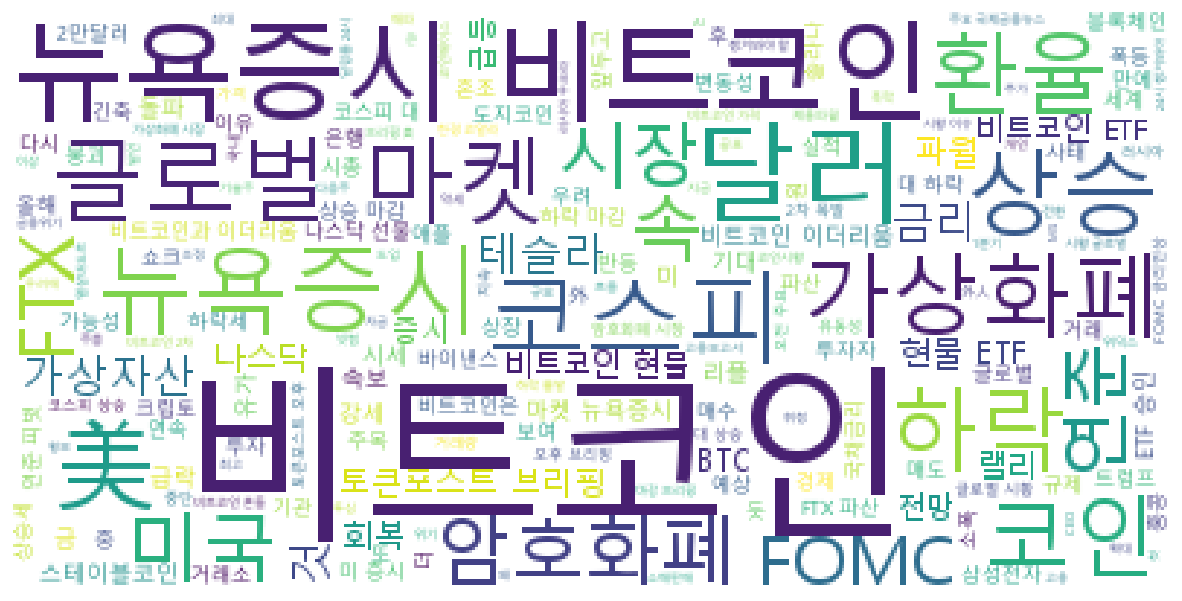

In [17]:
# 워드클라우드를 통한 핵심 키워드 시각화
text = ",".join(news_titles)
f_path = "C:\Windows\Fonts\malgun.ttf"

wc = WordCloud(font_path = f_path, random_state = 42, background_color = "white").generate(text)
plt.figure(figsize = (15, 10))
plt.axis("off")
plt.imshow(wc, interpolation = "None")
plt.show()

### 테스트 코드
- 종목 : 제주반도체

In [18]:
# 코스피 : .KS
# 코스닥 : .KQ

# 증권 데이터
# 일별
jeju = yf.download(sample, start_date, end_date)
# 주간
# jeju = yf.download(sample, start_date, end_date, interval = "1wk")

# 컬럼 추가 (증감량)
# diff() : 행과 행의 차이
jeju["change"] = jeju["Adj Close"].diff()#.abs() 상승, 하락 관계 없으면 절대 값 사용

# 컬럼 추가 (수익률)
# pct_change() : (다음행 - 현재행) ÷ 현재행
jeju["daily_return"] = jeju["Adj Close"].pct_change()*100
jeju

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,change,daily_return
Date,,,,,,,,
2021-01-04,3770.0,3790.0,3700.0,3740.0,3740.0,770788,NaN,NaN
2021-01-05,3740.0,3740.0,3655.0,3700.0,3700.0,490077,-40.0,-1.069519
2021-01-06,3705.0,3995.0,3705.0,3815.0,3815.0,4105868,115.0,3.108108
2021-01-07,3865.0,4655.0,3825.0,4180.0,4180.0,28056870,365.0,9.567497
2021-01-08,4230.0,4285.0,4060.0,4205.0,4205.0,4812752,25.0,0.598086
...,...,...,...,...,...,...,...,...
2024-05-27,20800.0,21100.0,20300.0,21000.0,21000.0,1054767,300.0,1.449275
2024-05-28,21200.0,21200.0,20800.0,21150.0,21150.0,778921,150.0,0.714286
2024-05-29,21400.0,24300.0,21200.0,22700.0,22700.0,8155709,1550.0,7.328605


In [19]:
# Yahoo Finance 뉴스 데이터
jeju_ticker = yf.Ticker(sample)
jeju_news = jeju_ticker.news
for i in range(len(jeju_news)) :
    print(jeju_news[i]["title"])

FRN Variable Rate Fix
Leading Hotel Brand Increases Self-Service Containment by 60 Percent Across More Than 10 Million Customer Interactions Annually with Verint Bots
Job loyalty: 61% of Americans are committed to staying put
Google hires Eli Lilly vet as CFO while search giant pivots to AI
Walmart paying annual bonuses to US hourly workers, a first for the grocery giant
A baby boomer who saved over $2 million for retirement explains what he thinks he did right to make the system work for him
PRT Growing Services Ltd. partners with Tłı̨chǫ Government on Northwest Territories’ largest tree-planting project ever
Q1 2025 Verint Systems Inc Earnings Call


In [20]:
# 특정 기간 수익률 계산 함수
def period_return(ticker_arg, start_d, end_d) :
    data = yf.download(ticker_arg, start = start_d, end = end_d)
    # 시작일, 종료일의 종가 -> 위치 인덱싱 사용
    start_price = data["Adj Close"].iloc[0] # DF의 첫 번째 행
    end_price = data["Adj Close"].iloc[-1] # DF의 마지막 행
    # 수익률 계산
    return (end_price - start_price) / start_price * 100

In [21]:
period_return(sample, "2024-02-15", "2024-06-04")

[*********************100%%**********************]  1 of 1 completed


-32.96875

In [22]:
max_change_idx = jeju["change"].idxmax().strftime("%Y-%m-%d") # change 컬럼에서 최댓값의 인덱스 반환
max_change_idx

'2024-03-28'

In [23]:
top10_change = jeju.nlargest(10, "change") # change 컬럼에서 상위 10개 값의 row 추출
top10_change

,Open,High,Low,Close,Adj Close,Volume,change,daily_return
Date,,,,,,,,
2024-03-28,23500.0,29000.0,23050.0,28600.0,28600.0,27918940,5250.0,22.483940
2024-01-19,23150.0,26950.0,21900.0,26250.0,26250.0,38373060,5000.0,23.529412
2024-01-22,27900.0,31600.0,27550.0,30700.0,30700.0,25971060,4450.0,16.952381
2024-01-15,17840.0,21250.0,17510.0,21150.0,21150.0,22329970,3100.0,17.174515
2024-01-24,31050.0,34850.0,29550.0,33800.0,33800.0,14980960,3100.0,10.097720
2024-01-02,13370.0,16990.0,13150.0,16700.0,16700.0,24147850,3000.0,21.897810
2024-02-06,24650.0,29200.0,22200.0,27450.0,27450.0,27558960,2950.0,12.040816
2024-02-14,28950.0,33400.0,28850.0,32300.0,32300.0,17882320,2400.0,8.026756
2023-12-08,9300.0,11620.0,9020.0,11280.0,11280.0,36652960,2340.0,26.174497


In [24]:
top10_change.index

DatetimeIndex(['2024-03-28', '2024-01-19', '2024-01-22', '2024-01-15',
               '2024-01-24', '2024-01-02', '2024-02-06', '2024-02-14',
               '2023-12-08', '2024-03-04'],
              dtype='datetime64[ns]', name='Date', freq=None)